## 2.7　花哨的索引

在前面的小节中，我们看到了如何利用简单的索引值（如`arr[0]`）、切片（如`arr[:5]`）和布尔掩码（如`arr[arr > 0]`）获得并修改部分数组。

在这一节中，我们将介绍另外一种数组索引，也称作花哨的索引（fancy indexing）。

花哨的索引和前面那些简单的索引非常类似，但是传递的是索引数组，而不是单个标量。花哨的索引让我们能够快速获得并修改复杂的数组值的子数据集。

### 2.7.1　探索花哨的索引

花哨的索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素。
<br>例如以下数组：

In [24]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


假设我们希望获得三个不同的元素，可以用以下方式实现：

In [25]:
[x[3], x[7], x[2]]

[71, 86, 14]

另外一种方法是通过传递索引的单个列表或数组来获得同样的结果：

In [26]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

利用花哨的索引，结果的形状与**索引数组**的形状一致，而不是与被索引数组的形状一致：

In [27]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

花哨的索引也对多个维度适用。假设我们有以下数组：

In [28]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列：

In [29]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

这里需要注意，结果的第一个值是`X[0, 2]`，第二个值是`X[1, 1]`，第三个值是`X[2, 3]`。
<br>在花哨的索引中，索引值的配对遵循2.5 节介绍过的广播的规则。
<br>因此当我们将一个列向量和一个行向量组合在一个索引中时，会得到一个二维的结果：

In [30]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

这里，每一行的值都与每一列的向量配对，正如我们看到的广播的算术运算：

In [31]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

这里特别需要记住的是，**花哨的索引返回的值反映的是广播后的索引数组的形状**，而不是被索引的数组的形状。

### 2.7.2　组合索引

花哨的索引可以和其他索引方案结合起来形成更强大的索引操作：

In [32]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


可以将花哨的索引和简单的索引组合使用：

In [33]:
X[2, [2, 0, 1]]

array([10,  8,  9])

也可以将花哨的索引和切片组合使用：

In [34]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

更可以将花哨的索引和掩码组合使用：

In [35]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

索引选项的组合可以实现非常灵活的获取和修改数组元素的操作。

### 2.7.3　示例：选择随机点

花哨的索引的一个常见用途是从一个矩阵中选择行的子集。
<br>例如我们有一个N×D 的矩阵，表示在D 个维度的N 个点。以下是一个二维正态分布的点组成的数组：

In [36]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

利用将在第4 章介绍的画图工具，可以用散点图将这些点可视化（如图2-7 所示）：

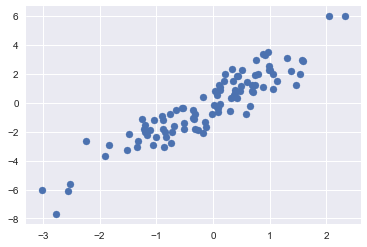

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置绘图风格

plt.scatter(X[:, 0], X[:, 1]);

我们将利用花哨的索引随机选取20 个点——选择20 个随机的、不重复的索引值，并利用这些索引值选取到原始数组对应的值：

In [38]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 4, 56, 44, 85, 16, 79, 59, 76, 38, 61, 60, 98, 32, 66, 50, 21, 28,
       14, 91, 47])

In [39]:
selection = X[indices] # 花哨的索引
selection.shape

(20, 2)

现在来看哪些点被选中了，将选中的点在图上用大圆圈标示出来（如图2-8 所示）：

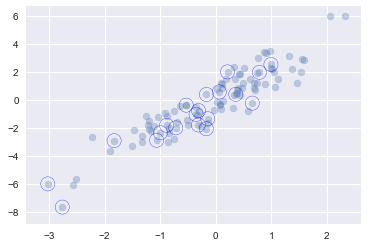

In [40]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', edgecolor='b', s=200);

这种方法通常用于快速分割数据，即需要分割训练/ 测试数据集以验证统计模型（详情请参见5.3 节）时，以及在解答统计问题时的抽样方法中使用。

### 2.7.4　用花哨的索引修改值

正如花哨的索引可以被用于获取部分数组，它也可以被用于修改部分数组。例如，假设我们有一个索引数组，并且希望设置数组中对应的值：

In [41]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


可以用任何的赋值操作来实现，例如：

In [42]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


不过需要注意，操作中**重复的索引会导致一些出乎意料的结果产生**，如以下例子所示：

In [43]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4 去哪里了呢？这个操作首先赋值x[0] = 4，然后赋值x[0] = 6，因此当然x[0] 的值为6。

以上还算合理，但是设想以下操作：

In [44]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

你可能期望x[3] 的值为2，x[4] 的值为3，因为这是这些索引值重复的次数。

但是为什么结果不同于我们的预想呢？

从概念的角度理解，这是因为`x[i] += 1` 是`x[i] = x[i] + 1` 的简写。
<br>`x[i] + 1` **计算后，这个结果被赋值给了x 相应的索引值。**

记住这个原理后，我们却发现数组并没有发生多次累加，而是发生了赋值，显然这不是我们希望的结果。

因此，如果你希望累加，该怎么做呢？你可以借助通用函数中的at() 方法（在NumPy 1.8以后的版本中可以使用）来实现。进行如下操作：

In [47]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


`at()` 函数在这里对给定的操作、给定的索引（这里是i）以及给定的值（这里是1）执行
的是就地操作。

另一个可以实现该功能的类似方法是通用函数中的`reduceat()` 函数，你可以在NumPy 文档中找到关于该函数的更多信息。

### 2.7.5　示例：数据区间划分

你可以用这些方法有效地将数据进行区间划分并手动创建直方图。

例如，假定我们有1000个值，希望快速统计分布在每个区间中的数据频次，可以用ufunc.at 来计算：

In [49]:
np.random.seed(42)
x = np.random.randn(100)

# 手动计算直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 为每个x找到合适的区间
i = np.searchsorted(bins, x)

# 为每个区间加上1
np.add.at(counts, i, 1)

计数数组counts 反映的是在每个区间中的点的个数，即直方图分布（如图2-9 所示）：

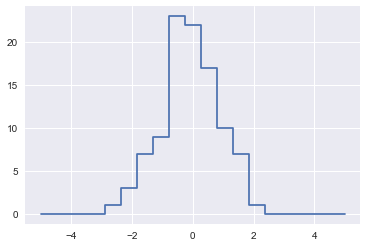

In [50]:
# 画出结果
plt.plot(bins, counts, linestyle='steps');

当然，如果每次需要画直方图你都这么做的话，也是很不明智的。这就是为什么Matplotlib
提供了plt.hist() 方法，该方法仅用一行代码就实现了上述功能：

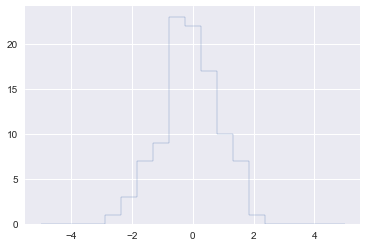

In [51]:
plt.hist(x, bins, histtype='step');

这个函数将生成一个和图2-9 几乎一模一样的图。
为了计算区间，Matplotlib 将使用`np.histogram` 函数，该函数的计算功能也和上面执行的计算类似。接下来比较一下这两种方法：

In [52]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
136 µs ± 4.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
33.4 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


可以看到，我们一行代码的算法比NumPy 优化过的算法快好几倍！这是如何做到的呢？
<br>如果你深入np.histogram 源代码（可以在IPython 中输入np.histogram?? 查看源代码），就会看到它比我们前面用过的简单的搜索和计数方法更复杂。
<br>这是由于NumPy 的算法更灵活（需要适应不同场景），因此在数据点比较大时更能显示出其良好性能：

In [53]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
109 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
232 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


以上比较表明，算法效率并不是一个简单的问题。一个对大数据集非常有效的算法并不总是小数据集的最佳选择，反之同理（详情请参见2.8.3 节）。

但是自己编写这个算法的好处是可以理解这些基本方法。你可以利用这些编写好的模块去扩展，以实现一些有意思的自定义操作。

将Python 有效地用于数据密集型应用中的关键是，当应用场景合适时知道使`np.histogram` 这样的现成函数，当需要执行更多指定的操作时也知道如何利用更低级的功能来实现。